<a href="https://colab.research.google.com/github/ScientificShrey/BCS_Drowsiness_Detection/blob/main/MAT_TO_MNE/MAT_to_MNE_Shrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1gPyVLDmxBwmf4u086eNf5sKAij_J6C-y

Downloading...
From (original): https://drive.google.com/uc?id=1gPyVLDmxBwmf4u086eNf5sKAij_J6C-y
From (redirected): https://drive.google.com/uc?id=1gPyVLDmxBwmf4u086eNf5sKAij_J6C-y&confirm=t&uuid=2279985d-045b-4ef8-827f-cc34b9486f2d
To: /content/mat2mne.mat
100% 22.5M/22.5M [00:00<00:00, 112MB/s] 


In [ ]:
!pip install mne

In [ ]:
%matplotlib inline
import numpy as np

from scipy.io import loadmat#.mat load karne ke liye
import mne, glob#glob for getting files

In [ ]:
matfiles = glob.glob('*.mat')#linux shell jaise files nikalne ke liye
data={}
matfiles

['mat2mne.mat']

In [ ]:
dat= loadmat(matfiles[0])
dat.keys()#marker, continous data, misc info

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [ ]:
dat['cnt'].shape,dat['cnt']

((190594, 59),
 array([[  -3,   -3,   -3, ...,    2,    7,    5],
        [ -25,  -21,  -26, ...,   19,   60,   45],
        [ -34,  -15,  -52, ...,   37,  130,   98],
        ...,
        [2524, 2672, 2347, ..., 1167, 1620, 1205],
        [2561, 2706, 2385, ..., 1249, 1693, 1210],
        [2606, 2759, 2457, ..., 1366, 1838, 1263]], dtype=int16))

In [ ]:
dat['mrk'][0][0][1].shape,dat['mrk'][0][0][1]#kaunsa event hua woh

((1, 200),
 array([[ 1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
         -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
          1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
          1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
         -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
          1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
         -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
         -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
          1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
          1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
         -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
         -1,  1, -1, -1, -1,  1,  1,  1]], dtype=int16))

In [ ]:
dat['mrk'][0][0][0].shape,dat['mrk'][0][0][0]#times jab jab event hua

((1, 200),
 array([[  2091,   2891,   3691,   4491,   5291,   6091,   6891,   7692,
           8492,   9292,  10092,  10892,  11692,  12492,  13292,  16294,
          17094,  17894,  18694,  19494,  20294,  21094,  21894,  22694,
          23494,  24294,  25094,  25894,  26694,  27494,  30495,  31295,
          32095,  32895,  33695,  34495,  35295,  36095,  36895,  37695,
          38495,  39295,  40095,  40895,  41695,  44696,  45496,  46296,
          47096,  47896,  48696,  49496,  50296,  51096,  51896,  52696,
          53496,  54296,  55096,  55896,  58895,  59695,  60495,  61295,
          62095,  62895,  63695,  64495,  65295,  66095,  66895,  67695,
          68495,  69295,  70095,  73094,  73894,  74694,  75495,  76295,
          77095,  77895,  78695,  79495,  80295,  81095,  81895,  82695,
          83495,  84295,  87294,  88094,  88894,  89694,  90494,  91294,
          92094,  92894,  93694,  94494,  97385,  98185,  98985,  99785,
         100585, 101385, 102185, 102985,

In [ ]:
dat['nfo']['fs'].shape,dat['nfo']['fs']#info nikala

((1, 1), array([[array([[100]], dtype=uint8)]], dtype=object))

In [ ]:
sfreq=dat['nfo']['fs'][0][0][0][0]#samplin freq nikala

sfreq

100

In [ ]:
EEGdata=dat['cnt'].T#Transpose karna padega
EEGdata.shape#for reference inhone sab data ko saath dala hai

(59, 190594)

In [ ]:
n_chan, n_samples = EEGdata.shape#a sample is each instance of data received

In [ ]:
dat['nfo']['clab'][0][0][0]#makes sense

array([array(['AF3'], dtype='<U3'), array(['AF4'], dtype='<U3'),
       array(['F5'], dtype='<U2'), array(['F3'], dtype='<U2'),
       array(['F1'], dtype='<U2'), array(['Fz'], dtype='<U2'),
       array(['F2'], dtype='<U2'), array(['F4'], dtype='<U2'),
       array(['F6'], dtype='<U2'), array(['FC5'], dtype='<U3'),
       array(['FC3'], dtype='<U3'), array(['FC1'], dtype='<U3'),
       array(['FCz'], dtype='<U3'), array(['FC2'], dtype='<U3'),
       array(['FC4'], dtype='<U3'), array(['FC6'], dtype='<U3'),
       array(['CFC7'], dtype='<U4'), array(['CFC5'], dtype='<U4'),
       array(['CFC3'], dtype='<U4'), array(['CFC1'], dtype='<U4'),
       array(['CFC2'], dtype='<U4'), array(['CFC4'], dtype='<U4'),
       array(['CFC6'], dtype='<U4'), array(['CFC8'], dtype='<U4'),
       array(['T7'], dtype='<U2'), array(['C5'], dtype='<U2'),
       array(['C3'], dtype='<U2'), array(['C1'], dtype='<U2'),
       array(['Cz'], dtype='<U2'), array(['C2'], dtype='<U2'),
       array(['C4'], dtype='<U

In [ ]:
clabel=[s[0] for s in dat['nfo']['clab'][0][0][0]]
nchannels = len(clabel)
clabel, nchannels

(['AF3',
  'AF4',
  'F5',
  'F3',
  'F1',
  'Fz',
  'F2',
  'F4',
  'F6',
  'FC5',
  'FC3',
  'FC1',
  'FCz',
  'FC2',
  'FC4',
  'FC6',
  'CFC7',
  'CFC5',
  'CFC3',
  'CFC1',
  'CFC2',
  'CFC4',
  'CFC6',
  'CFC8',
  'T7',
  'C5',
  'C3',
  'C1',
  'Cz',
  'C2',
  'C4',
  'C6',
  'T8',
  'CCP7',
  'CCP5',
  'CCP3',
  'CCP1',
  'CCP2',
  'CCP4',
  'CCP6',
  'CCP8',
  'CP5',
  'CP3',
  'CP1',
  'CPz',
  'CP2',
  'CP4',
  'CP6',
  'P5',
  'P3',
  'P1',
  'Pz',
  'P2',
  'P4',
  'P6',
  'PO1',
  'PO2',
  'O1',
  'O2'],
 59)

In [ ]:
event_onsets=dat['mrk'][0][0][0][0]#event ka times, itna weird form mai store kyu kiya hai?
event_codes=dat['mrk'][0][0][1][0]
nevents=len(event_onsets)
event_onsets, event_codes

(array([  2091,   2891,   3691,   4491,   5291,   6091,   6891,   7692,
          8492,   9292,  10092,  10892,  11692,  12492,  13292,  16294,
         17094,  17894,  18694,  19494,  20294,  21094,  21894,  22694,
         23494,  24294,  25094,  25894,  26694,  27494,  30495,  31295,
         32095,  32895,  33695,  34495,  35295,  36095,  36895,  37695,
         38495,  39295,  40095,  40895,  41695,  44696,  45496,  46296,
         47096,  47896,  48696,  49496,  50296,  51096,  51896,  52696,
         53496,  54296,  55096,  55896,  58895,  59695,  60495,  61295,
         62095,  62895,  63695,  64495,  65295,  66095,  66895,  67695,
         68495,  69295,  70095,  73094,  73894,  74694,  75495,  76295,
         77095,  77895,  78695,  79495,  80295,  81095,  81895,  82695,
         83495,  84295,  87294,  88094,  88894,  89694,  90494,  91294,
         92094,  92894,  93694,  94494,  97385,  98185,  98985,  99785,
        100585, 101385, 102185, 102985, 103785, 104585, 105385, 

In [ ]:
nevents=len(event_onsets)
nevents

200

In [ ]:
labels=np.zeros((1,n_samples),int)#label aur position ka array banana hoga
labels[0,event_onsets]=event_codes
labels#jis jis time pe event hoga waha pe code aur har jagah zero

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dat['nfo']['classes']

array([[array([[array(['left'], dtype='<U4'), array(['foot'], dtype='<U4')]],
              dtype=object)                                                  ]],
      dtype=object)

In [ ]:
class_labels=[s[0] for s in dat['nfo']['classes'][0][0][0]]
nclasses=len(class_labels)
class_labels, nclasses#sirf left aur foot hi kyu hai? to -1 woh left aur +1 foot?

(['left', 'foot'], 2)

In [ ]:
class1=class_labels[0]
class2=class_labels[1]

In [ ]:
#digitized electrode positions matlab?
dat['nfo']

array([[(array([[100]], dtype=uint8), array([[array(['left'], dtype='<U4'), array(['foot'], dtype='<U4')]],
              dtype=object), array([[array(['AF3'], dtype='<U3'), array(['AF4'], dtype='<U3'),
                array(['F5'], dtype='<U2'), array(['F3'], dtype='<U2'),
                array(['F1'], dtype='<U2'), array(['Fz'], dtype='<U2'),
                array(['F2'], dtype='<U2'), array(['F4'], dtype='<U2'),
                array(['F6'], dtype='<U2'), array(['FC5'], dtype='<U3'),
                array(['FC3'], dtype='<U3'), array(['FC1'], dtype='<U3'),
                array(['FCz'], dtype='<U3'), array(['FC2'], dtype='<U3'),
                array(['FC4'], dtype='<U3'), array(['FC6'], dtype='<U3'),
                array(['CFC7'], dtype='<U4'), array(['CFC5'], dtype='<U4'),
                array(['CFC3'], dtype='<U4'), array(['CFC1'], dtype='<U4'),
                array(['CFC2'], dtype='<U4'), array(['CFC4'], dtype='<U4'),
                array(['CFC6'], dtype='<U4'), array(['CFC8

In [ ]:
xpos=dat['nfo']['xpos']
ypos=dat['nfo']['ypos']
xpos,ypos

(array([[array([[-0.20109028],
                [ 0.20109028],
                [-0.48547489],
                [-0.32894737],
                [-0.16535231],
                [ 0.        ],
                [ 0.16535231],
                [ 0.32894737],
                [ 0.48547489],
                [-0.60591541],
                [-0.39919579],
                [-0.19765935],
                [ 0.        ],
                [ 0.19765935],
                [ 0.39919579],
                [ 0.60591541],
                [-0.74834683],
                [-0.52472976],
                [-0.30963911],
                [-0.10226303],
                [ 0.10226303],
                [ 0.30963911],
                [ 0.52472976],
                [ 0.74834683],
                [-0.87719298],
                [-0.64569058],
                [-0.421549  ],
                [-0.20773757],
                [ 0.        ],
                [ 0.20773757],
                [ 0.421549  ],
                [ 0.64569058],
        

In [ ]:
trials={}#har ek class ki trials
win=np.arange(int(0.5*sfreq),int(2.5*sfreq))#jab bhi hame time pata chale uske around window
nsamples=len(win)#itne samples honge us window mai
nsamples

200

In [ ]:
# sare classes mai loop kiya
for cl,code in zip(class_labels,np.unique(event_codes)):

  #uske onsets nikale
  class_onsets=event_onsets[event_codes==code]

  trials[cl] = np.zeros((nchannels,nsamples,len(class_onsets)))#channels, samples for each onset


  for i,onset in enumerate(class_onsets):
    trials[cl][:,:,i]=EEGdata[:,onset+win]

trials[class1].shape, trials[class2].shape

((59, 200, 100), (59, 200, 100))

In [ ]:
left = np.rollaxis(trials[class1],2,0)
foot = np.rollaxis(trials[class2],2,0)

In [ ]:
left.shape#100 instances 59 channels, 200 frames of events

(100, 59, 200)

In [ ]:

data=np.concatenate([left, foot])
Y = np.concatenate([-np.ones(left.shape[0]), np.ones(foot.shape[0])])
Y.shape

(200,)

mne structure ke liye
we need data, [trialsxchannelsxsamples]
y, class lavel array[1,labels]
sfreq
event_id
channels names bas

In [ ]:
n_channels = left.shape[1]
#apne mne ka info str create kiya
info=mne.create_info(
    ch_names=clabel,#changed this
    ch_types=['eeg']*nchannels,
    sfreq=sfreq
)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [ ]:
#digitized electrode positions
xpos=dat['nfo']['xpos'][0][0]
ypos=dat['nfo']['ypos'][0][0]
xpos.shape

(59, 1)

In [ ]:
layout_pos = np.concatenate([xpos,ypos],axis=1)
#sare x,ypoints ka list apne data ke hisaab se
layout_pos.shape

(59, 2)

In [ ]:
layout=mne.channels.generate_2d_layout(
    xy=layout_pos,
    ch_names=clabel,
    name='EEG custom Layout'

)

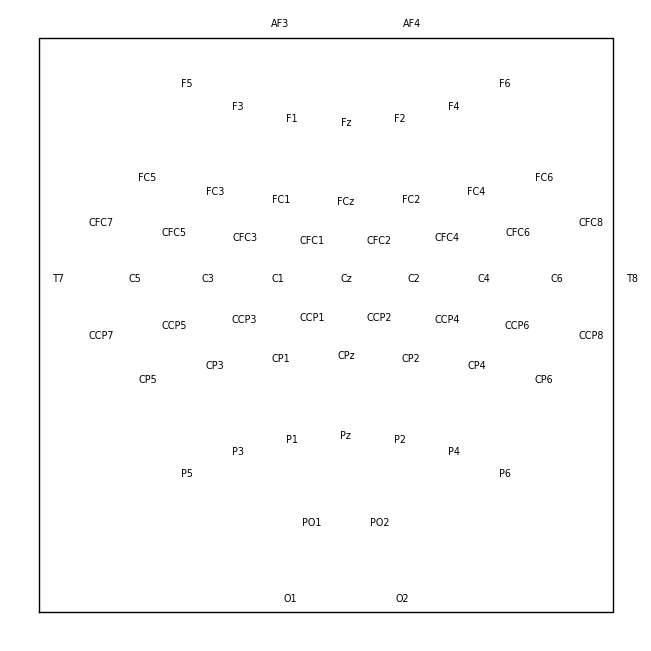

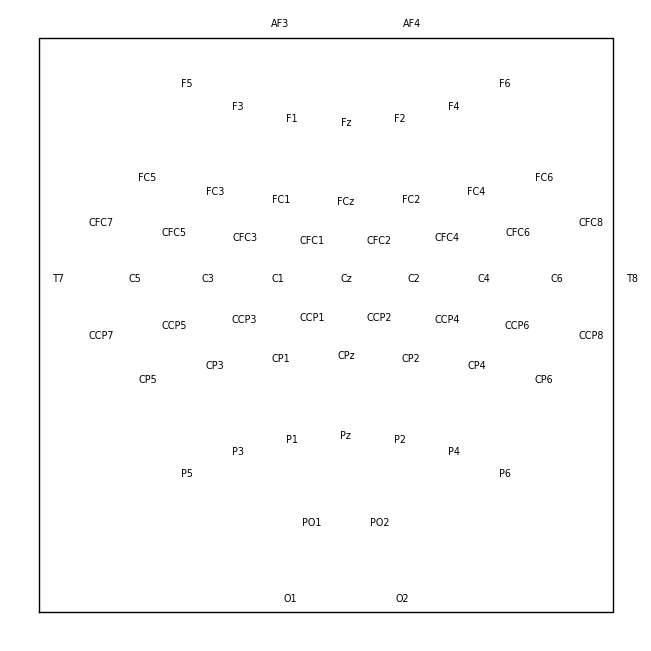

In [ ]:
layout.plot()

ValueError: Invalid value for the 'montage' parameter. Allowed values are 'standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed', 'biosemi16', 'biosemi32', 'biosemi64', 'biosemi128', 'biosemi160', 'biosemi256', 'easycap-M1', 'easycap-M10', 'easycap-M43', 'EGI_256', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'mgh60', 'mgh70', 'artinis-octamon', 'artinis-brite23', and 'brainproducts-RNP-BA-128', but got 'layout' instead.

events array ma onsets,zeros?,labels hova joiyr

In [ ]:
event_id = dict(left=-1, foot=1)

In [ ]:
event_length = Y.shape[0]
ev = [i*sfreq for i in range(event_length)]

events= np.column_stack((np.array(ev,dtype=int), np.zeros(event_length, dtype=int),np.array(Y, dtype=int)))

In [ ]:
events

array([[    0,     0,    -1],
       [  100,     0,    -1],
       [  200,     0,    -1],
       [  300,     0,    -1],
       [  400,     0,    -1],
       [  500,     0,    -1],
       [  600,     0,    -1],
       [  700,     0,    -1],
       [  800,     0,    -1],
       [  900,     0,    -1],
       [ 1000,     0,    -1],
       [ 1100,     0,    -1],
       [ 1200,     0,    -1],
       [ 1300,     0,    -1],
       [ 1400,     0,    -1],
       [ 1500,     0,    -1],
       [ 1600,     0,    -1],
       [ 1700,     0,    -1],
       [ 1800,     0,    -1],
       [ 1900,     0,    -1],
       [ 2000,     0,    -1],
       [ 2100,     0,    -1],
       [ 2200,     0,    -1],
       [ 2300,     0,    -1],
       [ 2400,     0,    -1],
       [ 2500,     0,    -1],
       [ 2600,     0,    -1],
       [ 2700,     0,    -1],
       [ 2800,     0,    -1],
       [ 2900,     0,    -1],
       [ 3000,     0,    -1],
       [ 3100,     0,    -1],
       [ 3200,     0,    -1],
       [ 3

In [ ]:
data.shape

(200, 59, 200)

In [ ]:
tmin = 0.5
evoked=mne.EvokedArray(EEGdata,info,tmin)

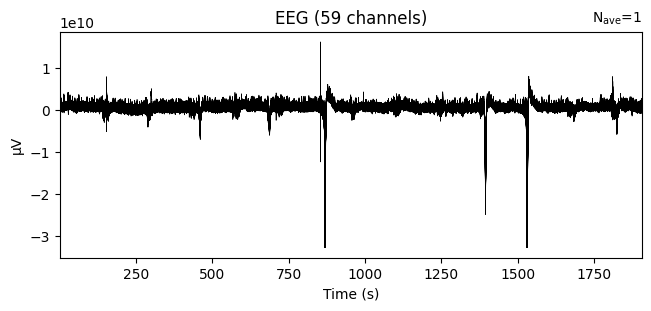

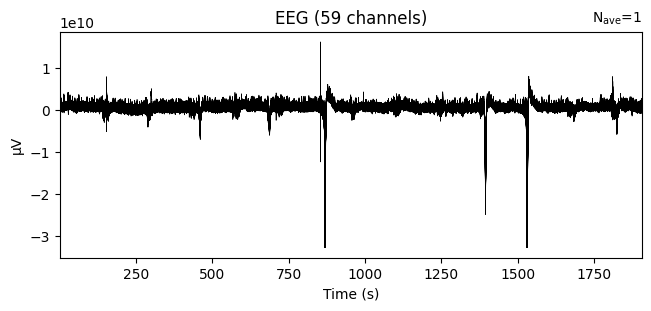

In [ ]:
evoked.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


<ipython-input-209-31020ea0c426>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  evoked.plot_psd()
<ipython-input-209-31020ea0c426>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked.plot_psd()


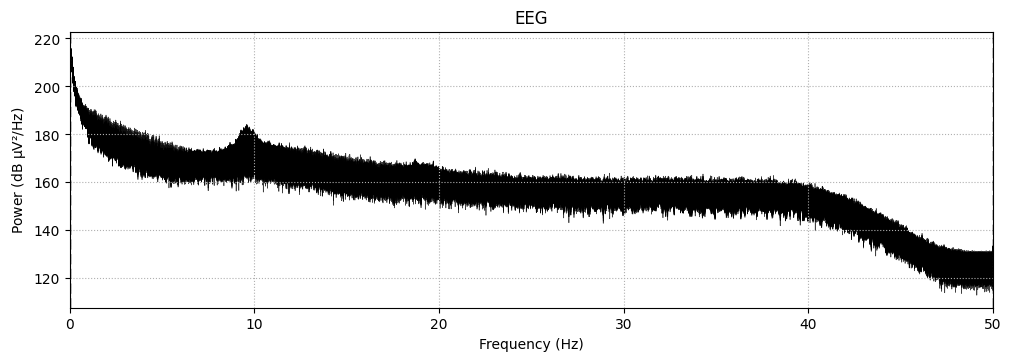

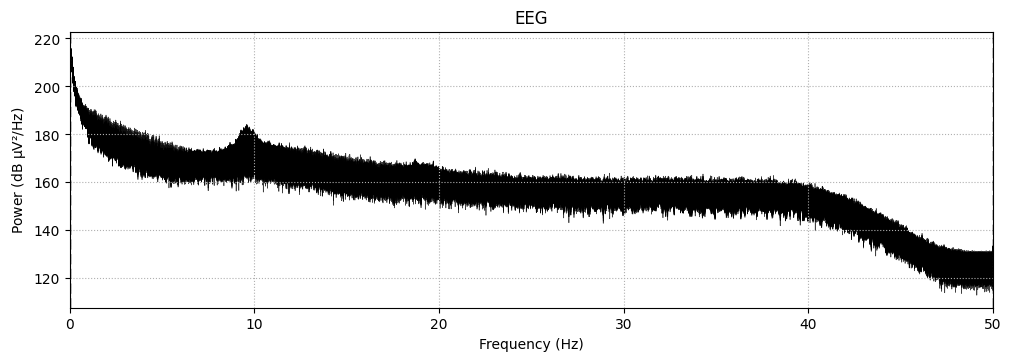

In [ ]:
evoked.plot_psd()#evoked object mai itna variance kyu?

In [ ]:
evoked.plot_topomap()

RuntimeError: No digitization points found.

In [ ]:
epochs=mne.EpochsArray(data,info,events,tmin,event_id)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
print(epochs['foot'])

<EpochsArray |  100 events (all good), 0.5 – 2.49 s, baseline off, ~9.1 MB, data loaded,
 'foot': 100>


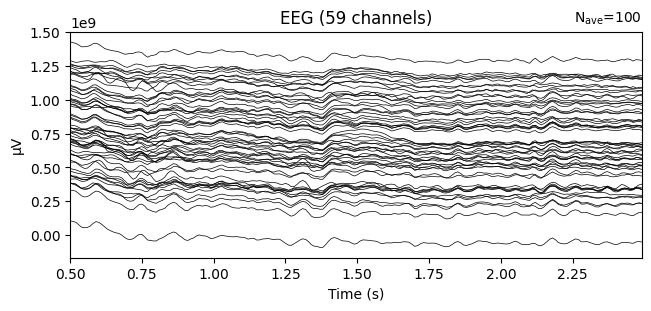

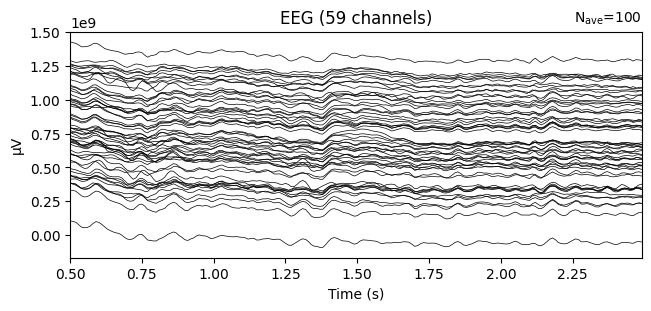

In [ ]:
epochs['foot'].average().plot()


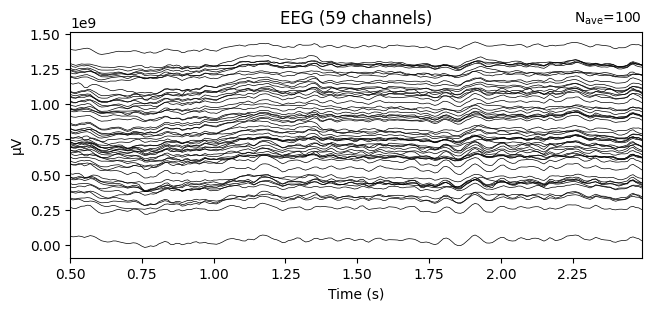

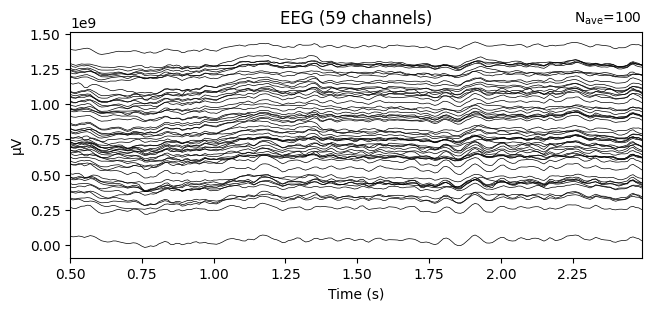

In [ ]:
epochs['left'].average().plot()

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-188-acac0dd21572>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.compute_psd().plot()
<ipython-input-188-acac0dd21572>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.compute_psd().plot()


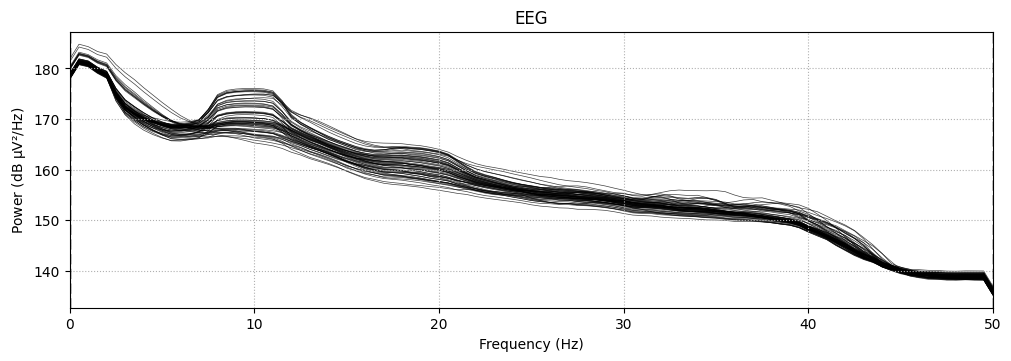

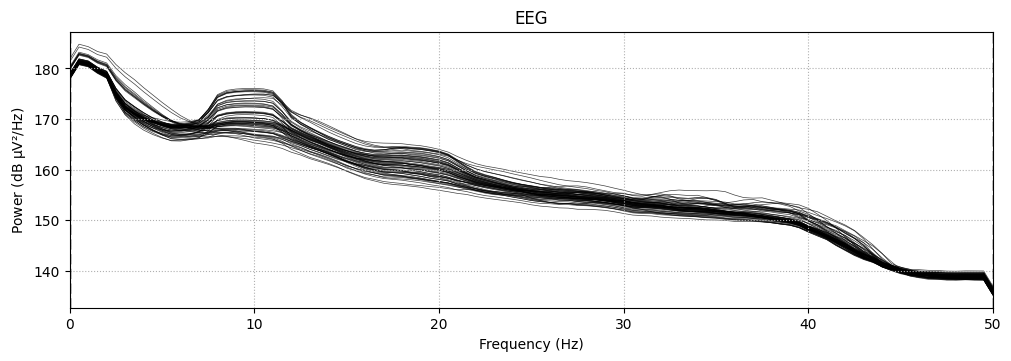

In [ ]:
epochs.compute_psd().plot()

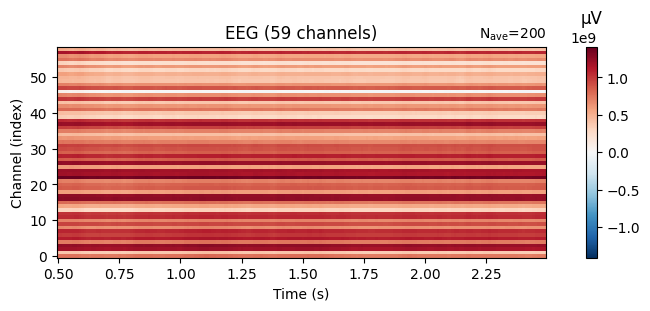

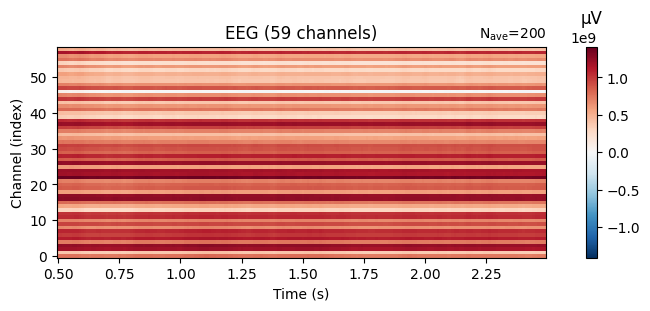

In [ ]:
epochs.average().plot_image()#why is my figure diff

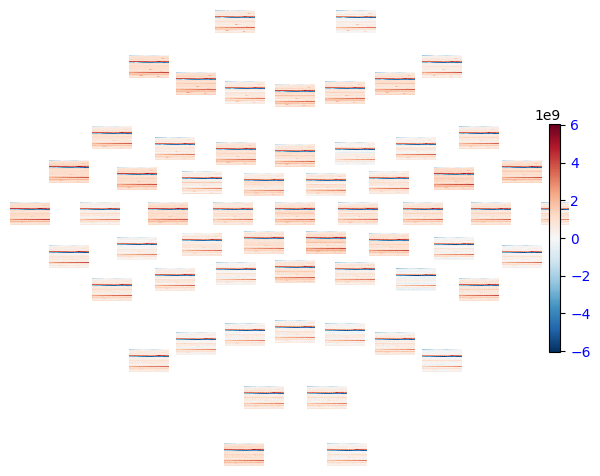

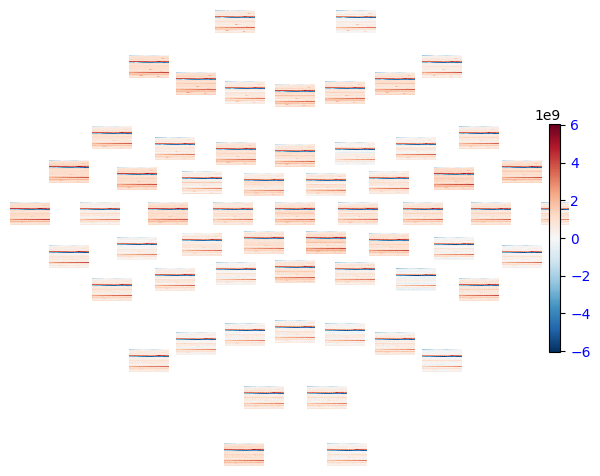

In [ ]:
epochs.plot_topo_image(layout=layout, fig_facecolor='w', font_color='b')

In [ ]:
left=epochs['left'].average()
left

Condition,left
Data kind,average
Timepoints,200 samples
Channels,59 channels
Number of averaged epochs,100
Time range (secs),0.5 – 2.49
Baseline (secs),off


Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


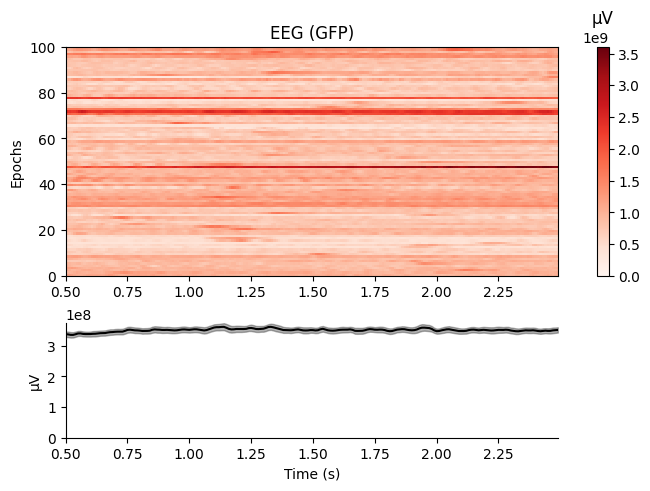

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


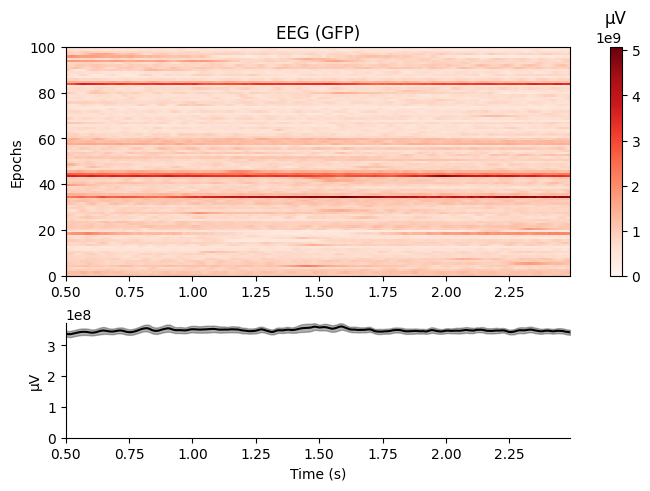

[<Figure size 640x480 with 3 Axes>]

In [ ]:
epochs['left'].plot_image()
epochs['foot'].plot_image()

In [ ]:
tfr=epochs.compute_tfr(method='morlet',freqs=np.arange(25,30))

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s
